## Inventory Optimization with Dynamic Programming in Less than 100 Python code

### Part 3: Implementing the Dynamic Programming for Inventory Optimization.

In first part of series on Inventory Optimization, a Markov Process was covered. Essentilally Markov Process was introduced to provide model of the states, how to model the transition of states in Inventory Optimization problem.

In the second part it was dicussed how fixes policy, can make Markoe reward Processs. The main goal of the second part was to follow Bellman Equation on how to find the Immediate reward and Value function for each state.


### Markov Decision Process

In this article, we are going to summarize everything and couple Markov process and MArkov Reward Process with **Markov Decision Process**.

Markov Decision Process is a  process, where all decsions are condidered for each state. In other words, we are going to consider all possible actions for each state.

In Markov Reward Process , the decsion were fixed, and we were not considering all possible actions for each state. In MDP, we need to build a data structure that for each state, we need to consider all possible actions, and following the $(S_t,A_t)$, we need to know what will be $(S_{t+1}, R_{t+1})$.

#### Example of Markov Decision Process Data Structure

Here I am giving you an example of MDP dictionary, where as you can see for each state, all possible actions need to be considred, and 

In [ ]:

MarkovDecProcessDict = {"Current State A":{"Action 1":{("NextS1fromAact1", "Reward1"): "PNextS1fromAact1"
                                           ,("NextS2fromAact1", "Reward2"): "PNextS2fromAact1"},
                                           "Action 2":{("NextS1fromAact2", "Reward2"): "PNextS1fromAact2"
                                           ,("NextS2fromAact2", "Reward2"): "PNextS2fromAact2"}},
                    
                     "Current State B":{"Action 1":{("NextS1fromBact1", "Reward1"): "PNextS1fromBact1"
                                           ,("NextS2fromBact1", "Reward2"): "PNextS2fromBact1"},
                                           "Action 2":{("NextS1fromBact2", "Reward2"): "PNextS1fromBact2"
                                           ,("NextS2fromBact2", "Reward2"): "PNextS2fromBact2"}}
}

for current_state, actions in MarkovRewProcessDict.items():
    print(f"Current State: {current_state}")
    
    for action, transitions in actions.items():
        print(f"  Action: {action}")
        
        for (next_state, reward), probability in transitions.items():
            print(f"  ({next_state},{reward}): {probability}")

## MDP for Inventory Optimization

In the first sarticle, we dicussed Markov Process for Inventory Optimization.In the second artcile we dicussed Markov reward Polciy for one **fixed policy** and found what are the state value function of state, if we follow that policy. But, then the question we asked is "How to find the best policy"?. To answer that question we are coing to markov Process and here we are building the dictionary, where for each state, we are considering all possible actions, and for each action, we are considering all possible states and rewards.

This ditionary name is **MDP_dict** and I wrote hands-one code of it below:


In [ ]:
from typing import Dict, Tuple

from rich import pretty
pretty.install()

# need numpy to do some numeric calculation
import numpy as np

# poisson is used to find pdf of Poisson distribution 
from scipy.stats import poisson

import pandas as pd
import numpy as np


In [1]:
from typing import Dict, Tuple
from scipy.stats import poisson
from typing import Dict

from rich import pretty
pretty.install()

MDP_dict: Dict[tuple, Dict[tuple, tuple]] = {}

user_capacity = 2
user_poisson_lambda = 1
holding_cost = 1
missedcostumer_cost = 10



for alpha in range(user_capacity+1):                            
                                                               
    for beta in range(user_capacity + 1 - alpha):
        
        # This is St, the current state
        state = (alpha, beta)                                   

        # This is initial inventory, total bike you have at 8AM 
        init_inv = alpha + beta                         
        
        # The beta1 is the beta in next state, irrespctive of current state (as the decsion policy is constant)
        beta1 = user_capacity - init_inv
        
        base_reward = -alpha* holding_cost
        # List of all possible demand you can get
        
        #dict1 = {}
        action = {}
        # Consider all possible actions
        for order in range(user_capacity-init_inv +1):
            
            #action = {}
            dict1 = {}
            for i in range(init_inv +1):

            # if initial demand can meet the deman
                if i <= (init_inv-1):
                
                # probality of specifc demand can happen
                    transition_prob = poisson.pmf(i,user_poisson_lambda)

                    dict1[((init_inv - i, order), base_reward)] = transition_prob

                         
            # if initial demand can not meet the demand
                else:
                
                    transition_prob = 1- poisson.cdf(init_inv -1, user_poisson_lambda)
                
                # probability of not meeting the demands
                    transition_prob2 = 1- poisson.cdf(init_inv, user_poisson_lambda)
                
                # total reward
                
                    reward = base_reward - missedcostumer_cost*((user_poisson_lambda*transition_prob) - \
                                                  init_inv*transition_prob2)                

                    dict1[((init_inv - i, order),reward)] = transition_prob

                    #if state in MDP_dict:

            action[order] = dict1

        MDP_dict[state]= action

MDP_dict
# Constants


{
    (0, 0): {
        0: {((0, 0), -10.0): 1.0},
        1: {((0, 1), -10.0): 1.0},
        2: {((0, 2), -10.0): 1.0}
    },
    (0, 1): {
        0: {
            ((1, 0), 0): 0.3678794411714424,
            ((0, 0), -3.6787944117144225): 0.6321205588285576
        },
        1: {
            ((1, 1), 0): 0.3678794411714424,
            ((0, 1), -3.6787944117144225): 0.6321205588285576
        }
    },
    (0, 2): {
        0: {
            ((2, 0), 0): 0.3678794411714424,
            ((1, 0), 0): 0.3678794411714424,
            ((0, 0), -1.03638323514327): 0.26424111765711533
        }
    },
    (1, 0): {
        0: {
            ((1, 0), -1): 0.3678794411714424,
            ((0, 0), -4.6787944117144225): 0.6321205588285576
        },
        1: {
            ((1, 1), -1): 0.3678794411714424,
            ((0, 1), -4.6787944117144225): 0.6321205588285576
        }
    },
    (1, 1): {
        0: {
            ((2, 0), -1): 0.3678794411714424,
            ((1, 0), -1): 0.3678794411714424,
            ((0, 0), -2.03638323514327): 0.26424111765711533
        }
    },
    (2, 0): {
        0: {
            ((2, 0), -2): 0.3678794411714424,
            ((1, 0), -2): 0.3678794411714424,
            ((0, 0), -3.03638323514327): 0.26424111765711533
        }
    }
}

In [ ]:
MDP_dict

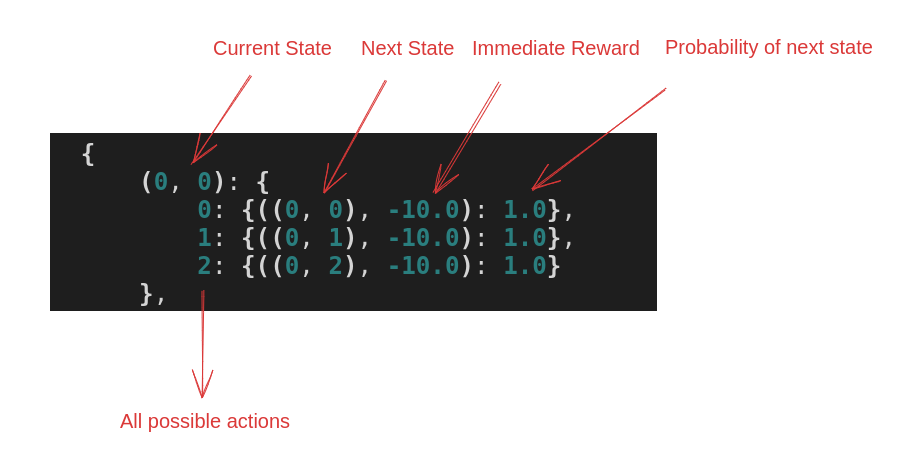

In [5]:
from IPython.display import Image, display
display(Image(filename="Img/explainmDPdic.png"))

### Sequence of the Policy Iteration algorithm:
- Start with V and Random Policy
- Apply that Policy
- Get the Value function of the states using the (matrix operation)
- Apply the greedy policy 
- New policy

In [ ]:
MDP_dict

In [ ]:
import random
pi_0 = random.choice([1,2,3])
pi_0

In [ ]:
MDP_dict[(0,0)]

In [ ]:
MDP_dict[(0,1)].keys()

In [ ]:
random.choice(list(MDP_dict[(0,1)].keys()))

In [ ]:
list(MDP_dict[(0,1)].keys())

In [ ]:
pi_0 = {}
for states in MDP_dict.keys():
    random_choice = random.choice(list(MDP_dict[states].keys()))
    pi_0[states] = random_choice

In [ ]:
pi_0

In [ ]:
from typing import Dict, Tuple
from scipy.stats import poisson
import numpy as np
import pandas as pd

class MarkovDecProcess_policy:
    def __init__(self, fixed_policy):
        self.MRP_dict = {}
        self.fixed_policy = fixed_policy

    def generate_Markov_Rew_Process_Dict(self, user_capacity: int, user_poisson_lambda: int,
                                          holding_cost: int, missedcostumer_cost: int):
        self.MRP_dict = {}  # Initialize the Markov Reward Process Dictionary

        for alpha in range(user_capacity + 1):
            for beta in range(user_capacity + 1 - alpha):
            
                state = (alpha, beta)
                init_inv = alpha + beta
                #beta1 = user_capacity - init_inv
                
                beta1=self.fixed_policy[state]
                
                base_reward = -alpha * holding_cost
            
                for demand in range(init_inv + 1):
                    if demand <= (init_inv - 1):
                        transition_prob = poisson.pmf(demand, user_poisson_lambda)
                                                
                        if state in self.MRP_dict:
                            self.MRP_dict[state][((init_inv - demand, beta1), base_reward)] = transition_prob
                        else:
                            self.MRP_dict[state] = {((init_inv - demand, beta1), base_reward): transition_prob}
                    else:
                        transition_prob = 1 - poisson.cdf(init_inv - 1, user_poisson_lambda)
                        transition_prob2 = 1 - poisson.cdf(init_inv, user_poisson_lambda)
                        reward = base_reward - missedcostumer_cost * ((user_poisson_lambda * transition_prob) -
                                                                init_inv * transition_prob2)
                        if state in self.MRP_dict:
                            self.MRP_dict[state][((0, beta1), reward)] = transition_prob
                        else:
                            self.MRP_dict[state] = {((0, beta1), reward): transition_prob}

    def calculate_expected_immediate_rewards(self):
        E_immediate_R = {}
        for from_state, value in self.MRP_dict.items():
            expected_reward = sum(reward[1] * prob for (reward, prob) in value.items())
            E_immediate_R[from_state] = expected_reward
        return E_immediate_R

    def create_transition_probability_matrix(self):
        states = list(self.MRP_dict.keys())
        num_states = len(states)
        trans_prob = np.zeros((num_states, num_states))
        df_trans_prob = pd.DataFrame(trans_prob, columns=states, index=states)

        for i, from_state in enumerate(states):
            for j, to_state in enumerate(states):
                for (new_state, reward) in self.MRP_dict.get(from_state, {}):
                    if new_state == to_state:
                        probability = self.MRP_dict[from_state].get((new_state, reward), 0.0)
                        df_trans_prob.iloc[i, j] = probability
        return df_trans_prob

    def calculate_state_value_function(self, trans_prob_mat, expected_immediate_rew, gamma):
        states = list(expected_immediate_rew.keys())
        R_exp = np.array(list(expected_immediate_rew.values()))
        val_func_vec = np.linalg.solve(np.eye(len(R_exp)) - gamma * trans_prob_mat, R_exp)
        MarkRevData = pd.DataFrame({'Expected Immediate Reward': R_exp, 'Value Function': val_func_vec}, index=states)
        return MarkRevData


In [ ]:
policy_0 = {}
for states in MDP_dict.keys():
    random_choice = random.choice(list(MDP_dict[states].keys()))
    policy_0[states] = random_choice
policy_0

In [ ]:
pi_0[(0,0)]

In [ ]:
policy_0 = {}

for states in MDP_dict.keys():
    random_choice = random.choice(list(MDP_dict[states].keys()))
    policy_0[states] = random_choice

#policy_0

MRP_p0 = MarkovDecProcess_policy(fixed_policy=policy_0)

user_capacity = 2
user_poisson_lambda = 2
holding_cost = 1
missedcostumer_cost = 10

MRP_p0.generate_Markov_Rew_Process_Dict(user_capacity, user_poisson_lambda, 
                                            holding_cost, missedcostumer_cost)

E_immediate_R = MRP_p0.calculate_expected_immediate_rewards()
trans_prob_mat = MRP_p0.create_transition_probability_matrix()

gamma = 0.9  # Replace with your desired discount factor
MRP_Data = MRP_p0.calculate_state_value_function(trans_prob_mat, E_immediate_R, gamma)

print(MRP_Data)

### TO NEXT
- Think about how to use the MDP_fixedpolicy
- Chnage policy and see how it produce the resulted table
- For each state then, q value should be claculted (using the V mapping we have from 
  previus stage) going through all the possible actions, max **q** should be slected.
- Then we ended up new policy

Go test2.py fil 
- Code working Here
- Now think how probality transition matrix chnage
- to calcute 
- Probaly I need that big matrix of the MArkov Decision Process
-  That Is same Ron Howard Did when running the Taxi Example

## Example of MDP MAtrix
+-----+------------+------------+------------+------------+
|     | (S1, A1)   | (S1, A2)   | (S2, A1)   | (S2, A2)   |
+-----+------------+------------+------------+------------+
| S1  | (0.7, 5)   | (0.3, 2)   | (0.1, 1)   | (0.9, 4)   |
+-----+------------+------------+------------+------------+
| S2  | (0.4, 3)   | (0.6, 1)   | (0.2, 2)   | (0.8, 3)   |
+-----+------------+------------+------------+------------+


In [ ]:
#All_states = [(alpha, beta) for alpha in range(self.user_capacity + 1)
        #             for beta in range(self.user_capacity + 1 - alpha)]
        #policy_0 = {}
        #for state in All_states:
        #    alpha, beta = state
        #    policy_0[state] = self.user_capacity - (alpha + beta)
        #return policy_0